In [1]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.preprocessing import Imputer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from collections import Counter
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold

from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, lars_path

In [2]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV


In [3]:
import xgboost as xgb

In [4]:
dummt_transformed = pd.read_csv("dummt_transformed.csv")

In [5]:
dummt_transformed.shape

(1460, 261)

In [6]:
dummt_transformed.columns

Index([u'Unnamed: 0', u'MSSubClass', u'LotFrontage', u'LotArea',
       u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd',
       u'MasVnrArea', u'BsmtFinSF1',
       ...
       u'SaleType_ConLI', u'SaleType_ConLw', u'SaleType_New', u'SaleType_Oth',
       u'SaleType_WD', u'SaleCondition_AdjLand', u'SaleCondition_Alloca',
       u'SaleCondition_Family', u'SaleCondition_Normal',
       u'SaleCondition_Partial'],
      dtype='object', length=261)

In [7]:
#get y 
y = np.log(dummt_transformed['SalePrice'])

In [8]:
dummt_transformed.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#Get X
X = dummt_transformed.drop(["Unnamed: 0", "SalePrice"], axis = 1)

In [10]:
X.shape

(1460, 259)

In [11]:
X.isnull().sum().sort_values()
#only LotFrontage has 259 NAs

MSSubClass                 0
BsmtQual_None              0
BsmtQual_TA                0
BsmtCond_Gd                0
BsmtCond_None              0
BsmtCond_Po                0
BsmtCond_TA                0
BsmtExposure_Gd            0
BsmtExposure_Mn            0
BsmtExposure_No            0
BsmtExposure_None          0
BsmtFinType1_BLQ           0
BsmtFinType1_GLQ           0
BsmtFinType1_LwQ           0
BsmtQual_Gd                0
BsmtFinType1_None          0
BsmtFinType1_Unf           0
BsmtFinType2_BLQ           0
BsmtFinType2_GLQ           0
BsmtFinType2_LwQ           0
BsmtFinType2_None          0
BsmtFinType2_Rec           0
BsmtFinType2_Unf           0
Heating_GasA               0
Heating_GasW               0
Heating_Grav               0
Heating_OthW               0
Heating_Wall               0
HeatingQC_Fa               0
BsmtFinType1_Rec           0
                        ... 
Neighborhood_NPkVill       0
Neighborhood_NWAmes        0
Neighborhood_NoRidge       0
Neighborhood_N

In [12]:
#replace NAs with the mean using Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imp = imp.fit(X)
X_imp = imp.transform(X)

In [14]:
y.shape

(1460,)

In [27]:
rfr_model = RFR()
cross_validation = StratifiedKFold(n_splits = 10, shuffle = False, random_state = None)
parameter_grid = {"n_estimators":np.arange(10, 100, 10), "max_depth": range(5,10)}

grid_search = GridSearchCV(rfr_model, param_grid=parameter_grid, cv=cross_validation, n_jobs=4)
grid_search.fit(X_imp, y)
print grid_search.best_score_
print grid_search.best_params_

KeyboardInterrupt: 

>>> print grid_search.best_score_
0.796586507627
>>> print grid_search.best_params_
{'n_estimators': 60, 'max_depth': 9}

In [29]:
rfr = RFR(n_estimators = 60, max_depth = 9)
rfr.fit(X_imp, y)


In [34]:
mse = np.mean((y - rfr.predict(X_imp))**2)

In [35]:
mse

0.004906043964130698

In [30]:
#Get the feature_importances_
fea_import = pd.DataFrame(rfr.feature_importances_, index = X.columns, columns = ["Feature_Importance"]).sort_values(by = "Feature_Importance", ascending = True)
fea_import.tail(10)

,Feature_Importance
OverallCond,0.011497
LotArea,0.011533
CentralAir_Y,0.015937
BsmtFinSF1,0.019520
GarageArea,0.022771
1stFlrSF,0.028111
TotalBsmtSF,0.044963
GarageCars,0.046137
GrLivArea,0.110805
OverallQual,0.564284


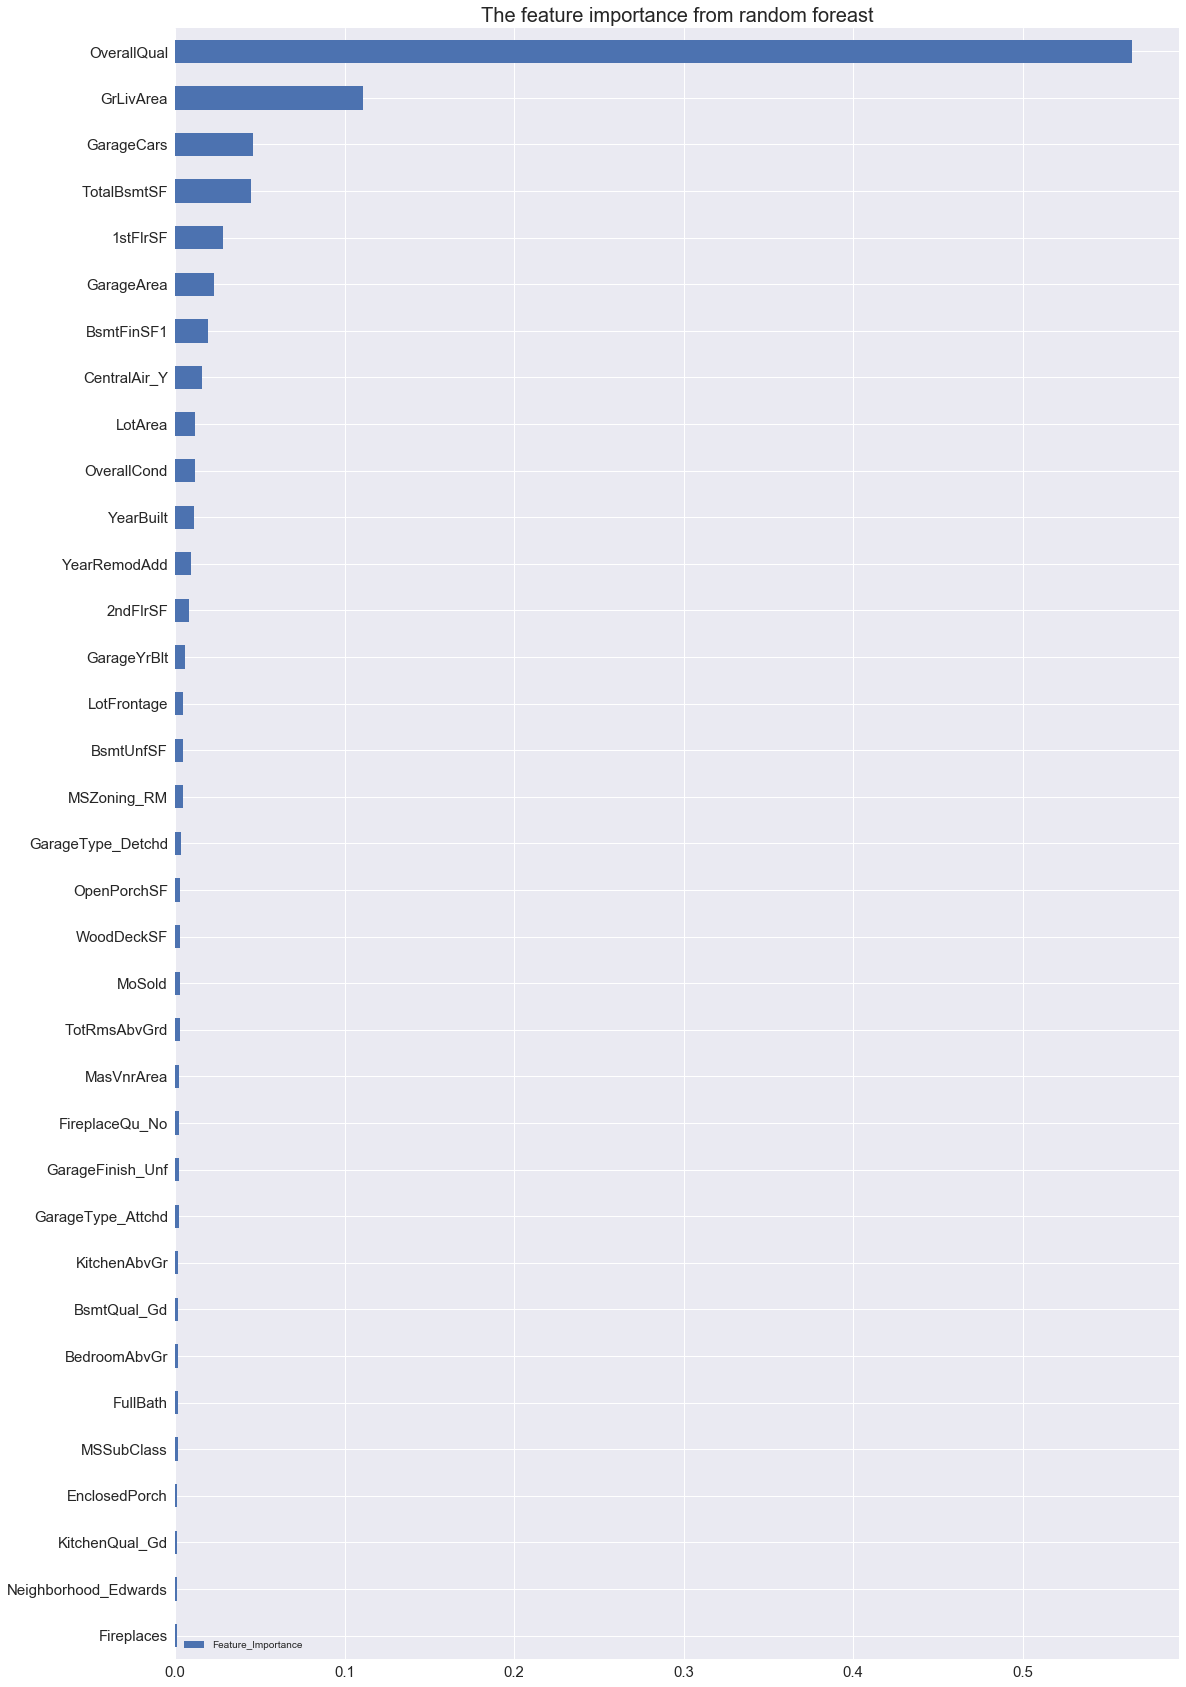

In [32]:
#plot the feature importance
ax = fea_import.iloc[-35:, :].plot.barh(figsize = (18,30),fontsize = 15)
ax.set_title("The feature importance from random foreast", fontsize = 20)

In [46]:
#select top35
top35 = fea_import.index[-35:]

In [47]:
#subset X for ridge regression
X_ri = X[top35]

In [49]:
#replace the NaN with mean
imp = imp.fit(X_ri)
X_ri = imp.transform(X_ri)

In [50]:
alphas = np.logspace(-6,4,11)
rcv = RidgeCV(alphas = alphas, store_cv_values=True,normalize=False)
rcv.fit(X_ri,y)
cv_vals = rcv.cv_values_
LOOr = cv_vals.mean(axis=0)
#zip(alphas,LOOr)

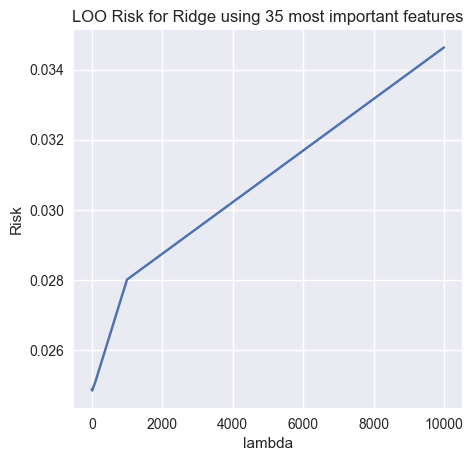

In [76]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.plot(alphas,LOOr)
plt.xlabel('lambda')
plt.ylabel('Risk')
plt.title('LOO Risk for Ridge using 35 most important features')
#plt.xlim([0,20])
#plt.ylim([0.006,0.010])
plt.show()

In [74]:
min(dict(zip(alphas,LOOr)).items(), key=lambda x: x[1])
#the minimum MSE is 0.02584

(10.0, 0.024844449208067141)

In [58]:
#use xgboost
xgb_model = xgb.XGBRegressor()
cross_validation = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
parameter_grid = {'max_depth': range(5,10), 'n_estimators': np.arange(10,100,10)}
xgbgrid = GridSearchCV(xgb_model, param_grid=parameter_grid, cv=cross_validation) 
xgbgrid.fit(X_imp,y)
print xgbgrid.best_score_
print xgbgrid.best_params_


0.838368665831
{'n_estimators': 90, 'max_depth': 5}


In [15]:
xgbm = xgb.XGBRegressor(max_depth = 5, n_estimators = 90)
xgbm.fit(X_imp, y)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=90, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)

In [16]:
testdata = pd.read_csv("dummt_test_transformed.csv")

In [19]:
testdata = testdata.drop(["Unnamed: 0"], axis = 1)

In [20]:
testdata.shape

(1459, 259)

In [22]:
ypred = xgbm.predict(testdata)


In [24]:
ypred_final = np.exp(ypred)

In [25]:
ypred_final.to

array([ 114140.1796875,   99208.609375 ,  170060.75     , ...,
        154704.796875 ,  108794.25     ,  204665.984375 ], dtype=float32)

In [53]:
kf = KFold(n_splits = 5)

In [54]:
rfrloo = cross_val_score(rfr, X_imp, y, cv = kf, scoring = 'neg_mean_squared_error')

In [52]:
np.mean(rfrloo)

-0.022005433910769069

In [ ]:
#calculate the MSE for loo iteration
loo = LeaveOneOut()
rfrloolist = []
for num in np.arange(10, 50, 10):
    rfr = RFR(n_estimators =num)
    rfrloo = -cross_val_score(rfr, X_imp, y, cv = loo, scoring = 'neg_mean_squared_error')
    rfrloolist.append(rfrloo)
    print "With n_estimator being", num, "the MSE is", np.mean(rfrloo) #MSE using loo random forest loo #0.02108469091334287

In [ ]:
With n_estimator being 10 the MSE is 0.0233179427457